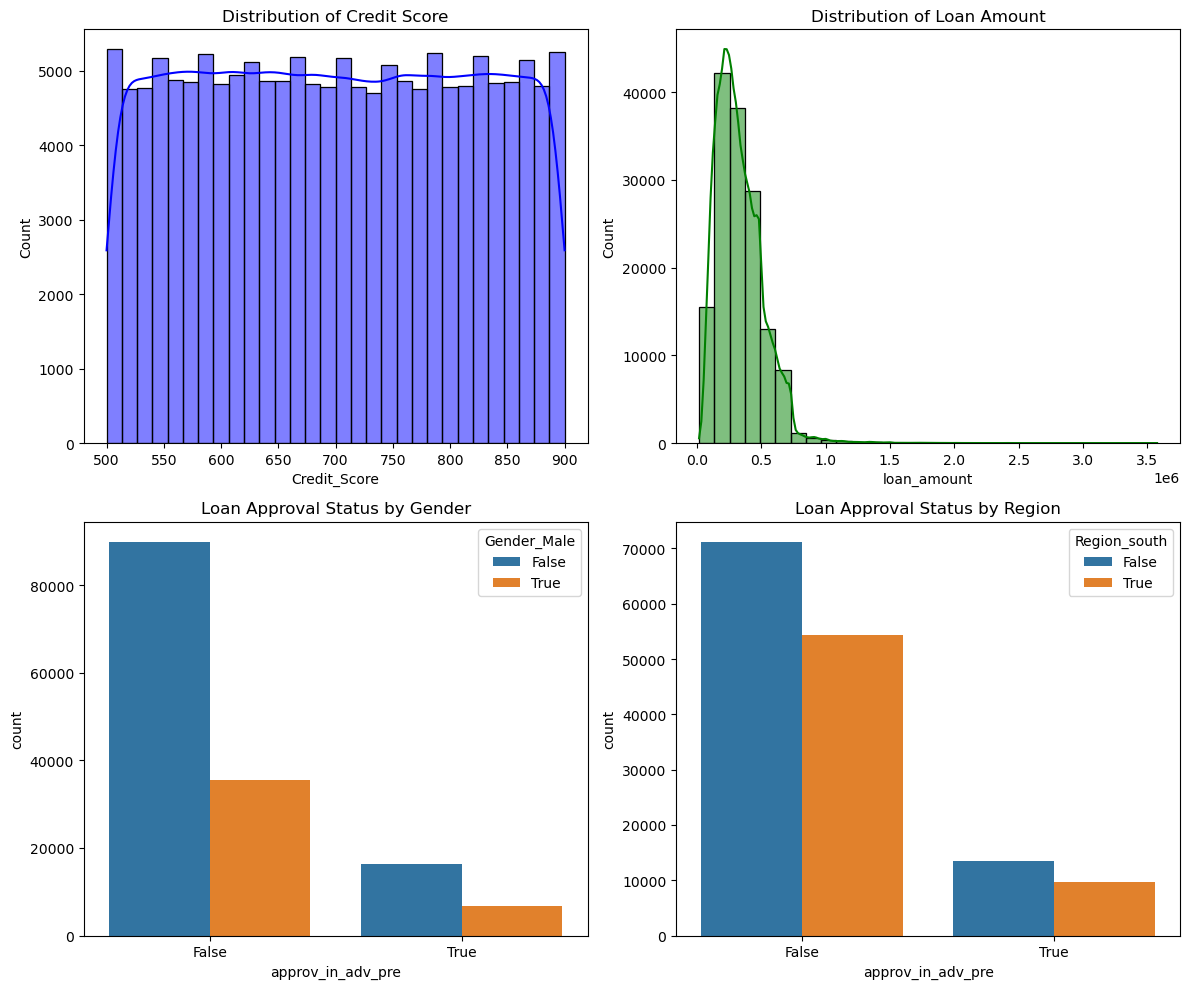

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your local file path
file_path = r"C:\Users\gitau\Downloads\Loan_Default.csv"
df = pd.read_csv(file_path)

# Handle missing values - Impute missing numeric values with the median, and categorical with the mode
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])
df['approv_in_adv'] = df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0])
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].median())
df['Upfront_charges'] = df['Upfront_charges'].fillna(df['Upfront_charges'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['LTV'] = df['LTV'].fillna(df['LTV'].median())

# Impute missing categorical values in columns like 'loan_purpose', 'Neg_ammortization', 'co-applicant_credit_type', 'age', 'submission_of_application', and 'Security_Type'
df['loan_purpose'] = df['loan_purpose'].fillna(df['loan_purpose'].mode()[0])
df['Neg_ammortization'] = df['Neg_ammortization'].fillna(df['Neg_ammortization'].mode()[0])
df['co-applicant_credit_type'] = df['co-applicant_credit_type'].fillna(df['co-applicant_credit_type'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mode()[0])
df['submission_of_application'] = df['submission_of_application'].fillna(df['submission_of_application'].mode()[0])
df['Security_Type'] = df['Security_Type'].fillna(df['Security_Type'].mode()[0])

# Convert categorical variables into numerical or dummy variables where necessary
df = pd.get_dummies(df, columns=['Gender', 'loan_type', 'loan_purpose', 'Region', 'Security_Type', 'approv_in_adv'], drop_first=True)

# Create subplots for visualizing the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Distribution of Credit Score
sns.histplot(df['Credit_Score'], kde=True, color='blue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Credit Score')

# Plot 2: Distribution of Loan Amount
sns.histplot(df['loan_amount'], kde=True, color='green', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Loan Amount')

# Plot 3: Loan Approval Status by Gender
sns.countplot(x='approv_in_adv_pre', hue='Gender_Male', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Approval Status by Gender')

# Plot 4: Loan Approval Status by Region
sns.countplot(x='approv_in_adv_pre', hue='Region_south', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Approval Status by Region')

plt.tight_layout()
plt.show()
